<a href="https://colab.research.google.com/github/xKDR/order_substantive_classification/blob/main/whether_substantive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> </h1>

<center>

<h1>Evaluating Machine Learning and LLM approaches to estimate adjournment rates: an experiment in some Bombay courts</h1>


<h3> Pavithra Manivannan<sup>1
</sup> Ayush Patnaik <sup>1</sup>
</sup> Bhargavi Zaveri Shah<sup>1</sup>
<!-- </sup> Ayush Patnaik<sup>1</sup> -->

</h3>
</center>
<center>
<h3>
1. XKDR Forum
</h3>
</center>

We extend our thanks to Susan Thomas, Siddarth Raman, Samriddha Adhikary and Shreyan Chakraborty for their valuable contributions

 **License:**
 Copyright (c) 2024 XKDR. This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

# Abstract

This study explores the use of natural language processing (NLP) to analyze court orders, comparing large language models (LLMs) with traditional machine learning (ML) techniques. We focus on classifying orders as either 'substantive' or 'non-substantive,' where substantive hearings advance case resolution by addressing key legal issues. This distinction is important for assessing court efficiency and tracking case progression. The problem is of binary classification, well-suited for NLP techniques.

Our models achieved 89% accuracy with ML and 84% with LLMs. While LLMs don't require labeled training data, ML models offer faster execution.

The methodology, fully reproducible in Google Colab, provides scalable NLP solutions for legal document analysis and court performance evaluation. We also release a dataset of 2,013 court orders for further research.

# 1 Introduction

Estimating the rate of adjournments, by classifying court hearings as *substantive* or *non-substantive*, can help improve case scheduling by courts and provide more predictability to litigants. Substantive hearings contribute to resolving a case by addressing core legal issues, while non-substantive hearings involve adjournments and procedural directions.

Implementing a classification system for court hearings poses significant challenges due to the unstructured nature and language of court orders and lack of standardized documentation across jurisdictions. Manual efforts (Manivannan et al., 2023; Myers, 2015; Jauhar et al., 2016; Daksh, 2016) provide valuable insights, but are labor-intensive and not scalable. To get better, ongoing and more precise estimates of adjournment rates, a key challenge is to scale up this categorization across a wider number of cases, courts and types of cases.

In this article, we demonstrate the potential to scale up such classification using two different approaches that are commonly used in the field of computing to analyse textual data, machine learning models and large language models.
Classifying hearings as 'substantive' or 'non-substantive' is a binary classification task well-suited to NLP. Machine learning models, like LightGBM, excel in such tasks by identifying textual patterns, offering an efficient and scalable solution. However, the nuanced legal language might vary between courts, potentially limiting a model's transferability. On the other hand, LLMs, with their broad knowledge base and ability to understand context, may offer a solution to this transferability challenge, potentially generalizing better across different legal jurisdictions and writing styles. There are other trade-offs to be made as well. For example, while LLMs do not require labeled training data—reducing costs and time associated with data generation—machine learning classifiers can be quicker in generating outputs based on the available training datasets.

Demonstrating the application of these two approaches gives us a sense of whether they work to read non-standardized documents such as court orders, their relative accuracy scores and the costs and benefits of using one over another. Reis et al. (2019) highlight AI's role in enhancing data interpretation and decision-making in public administration. Bansal et al. (2019) review deep learning applications in the legal domain, demonstrating how advanced technologies can streamline processes and improve efficiency. Nay (2018) shows how NLP can uncover patterns in unstructured legal texts that traditional methods might miss.

We explore classification using both LightGBM and LLMs, guided by predefined classification rules. We implement LightGBM and LLM classifiers to automate the categorization of court orders into substantive and non-substantive orders. The LightGBM classifier achieved 89% accuracy, while the LLM achieved 84% accuracy with longer processing time. We also release a dataset of 2,013 court orders to support future research in legal document analysis.

# 2 Cloud-based environment

Reproducibility in NLP research poses significant challenges due to the intricate interactions between preprocessing steps, model parameters, and external dependencies. Even minor variations in tokenization, data cleaning, or library versions can lead to inconsistent outcomes, complicating efforts to replicate results across different experiments. Computational notebooks can assist in addressing these issues by providing a structured environment for documenting and executing code, making them especially helpful for lawyers and individuals less familiar with programming. These notebooks allow users to present code alongside descriptive text, equations, visualizations, and tables in a single document (Rowe et al., 2020), thus enhancing the reproducibility and transparency of scientific research.

Despite the advances offered by computational notebooks, a significant challenge persists in the reproducibility of the computational environment, which is essential for generating consistent results. A notebook user still needs to download, install, and manage numerous computational libraries and their dependencies.

Cloud-based environments such as [Google Colab](https://colab.research.google.com/),  [Anaconda Cloud](https://anaconda.cloud/) or [Deepnote](https://deepnote.com/) offer solutions to the reproducible-environment problem. They operate on cloud computers that can be reproduced with a single click, and Google Colab even offers free GPU compute units, which can be particularly beneficial for running LLMs that require significant computational resources. To process court orders in a fully reproducible cloud-based environment, we host our notebook on Google Colab.

This cloud-based environment can be easily duplicated, run, and extended after logging in with a Google account. Furthermore, when operating in the cloud, the “forms” feature of Google Colab’s code cells facilitates the display, folding, and parameterization of code.

At its minimum, this environment requires the libraries shown in Table 1. The results were produced using Python 3.10.12. To start, we install the required Python libraries that are not pre-installed in Google Colab.

<table>
  <tr>
    <th>Package</th>
    <th>Version</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>langchain</td>
    <td>0.3</td>
    <td>Library for building and using language models</td>
  </tr>
  <tr>
    <td>langchain-core</td>
    <td>0.3</td>
    <td>Core components of the Langchain library</td>
  </tr>
  <tr>
    <td>langchain-community</td>
    <td>0.3</td>
    <td>Community-contributed modules for Langchain</td>
  </tr>
  <tr>
    <td>sqlite3</td>
    <td>2.6</td>
    <td>Library for interfacing with an SQLite database engine</td>
  </tr>
  <tr>
    <td>pdfplumber</td>
    <td>0.11</td>
    <td>Library for extracting text from PDFs</td>
  </tr>
  <tr>
    <td>pytesseract</td>
    <td>0.3</td>
    <td>Wrapper for Tesseract OCR</td>
  </tr>
  <tr>
    <td>pdf2image</td>
    <td>1.17</td>
    <td>Library for converting PDF files to images</td>
  </tr>
  <tr>
    <td>scikit-learn</td>
    <td>1.5</td>
    <td>Machine learning library</td>
  </tr>
  <tr>
    <td>nltk</td>
    <td>3.8</td>
    <td>A natural language toolkit</td>
  </tr>
  <tr>
    <td>lightgbm</td>
    <td>4.5</td>
    <td>A gradient boosting framework for machine learning</td>
  </tr>
  <tr>
    <td>tqdm</td>
    <td>4.66</td>
    <td>Library to show a progress bar</td>
  </tr>
  <tr>
    <td>pandas</td>
    <td>2.1</td>
    <td>Library for handling DataFrames</td>
  </tr>
  <tr>
    <td>pillow</td>
    <td>10.4</td>
    <td>A Python imaging library</td>
  </tr>
  <tr>
    <td>matplotlib</td>
    <td>3.7</td>
    <td>A Python plotting library</td>
  </tr>
</table>

<b> Table 1: </b> List of libraries used in the project

While running the notebook on Google Cloud, ensure the runtime is T4, which is a GPU instance.

## 2.1 Installing packages

To set up our cloud-based environment, we install the necessary Python packages using the pip command in Google Colab. Below is the code snippet used for installation:

In [ ]:
%%capture

# Package for running LLMs locally
!pip install langchain==0.3
!pip install langchain-core==0.3
!pip install langchain-community==0.3

# Package for working with SQL lite database
!pip install sqlite3==2.6

# Package for reading PDF files
!pip install pdfplumber==0.11
!pip install pytesseract==0.3
!pip install pdf2image==1.17

# Machine learning packages
!pip install scikit-learn==1.5
!pip install nltk==3.8
!pip install lightgbm==4.5

# Other helpful libraries
!pip install tqdm==4.66
!pip install pandas==2.1
!pip install pillow==10.4
!pip install matplotlib==3.7

## 2.2 Import packages

After installing the necessary packages, we import the required libraries into our Python environment.

In [ ]:
import lightgbm as lgb  # LightGBM is a gradient boosting framework used for training models.
import sqlite3 as db  # SQLite is a lightweight database library for managing database connections.
import io  # IO module to handle input and output operations.
import pdfplumber  # PDF processing library for extracting text from PDF files.
import pandas as pd  # Pandas is a powerful data manipulation and analysis library.

import pytesseract  # Python wrapper for Google's Tesseract-OCR Engine to perform optical character recognition (OCR).
from pdf2image import convert_from_bytes  # Converts PDF files into images for OCR processing.

# import re  # Regular expressions library for string matching and manipulation.
from nltk.corpus import stopwords  # Natural Language Toolkit (NLTK) for handling stopwords in text.
from nltk.tokenize import word_tokenize  # Function to tokenize text into individual words.
from nltk.stem import WordNetLemmatizer  # Lemmatizer for reducing words to their base or dictionary form.
from sklearn.model_selection import train_test_split  # Function to split data into training and test sets.
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text documents to TF-IDF feature vectors.
from sklearn.metrics import classification_report, accuracy_score  # Functions for evaluating model performance.
from sklearn.utils import resample  # Utility for resampling data (e.g., for balancing classes).

from tqdm import tqdm  # Library for displaying progress bars during iterations.

import nltk  # Main NLTK library for various NLP tasks.

from langchain_community.llms import Ollama # Library for connecting to Ollama

import matplotlib.pyplot as plt # 3.7.1

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 2.3 Install dependancies

We install additional dependencies required for specific functionalities in our analysis. These include:

**Poppler:** This package provides a collection of utilities for working with PDF documents. It includes tools for converting PDF files to various formats, extracting text from PDFs, and manipulating PDF content.

**Tesseract-OCR:** Tesseract is a powerful optical character recognition (OCR) engine that converts images of text into machine-readable text. It is particularly useful for extracting text from scanned documents or images embedded in PDF files. By installing Tesseract, we enable our program to perform OCR on images when direct text extraction is not feasible.

**PCI Utils** is a collection of utilities for inspecting and managing PCI (Peripheral Component Interconnect) devices in the system. This package provides tools that allow us to query information about the hardware components connected to the PCI bus, such as graphics cards, network interfaces, and other peripherals. It is useful when working with machine learning models that may require GPU acceleration, as it enables us to identify available hardware resources and ensure that the appropriate drivers are installed.

In [ ]:
%%capture

!sudo apt-get install -y poppler-utils
!sudo apt-get install tesseract-ocr
!sudo apt install pciutils

# 3 Data

Our datasets contain the PDFs of the orders passed in the cases, with each order having been manually classified into substantive or non-substantive. We use this manually annotated data-set for both training the LightGBM model, testing it and groundtruthing the results obtained on applying the ML model and the LLM. For implementing the LightGBM model, we train it on 80% of this data-set and test it on the remaining 20%. The LLM, as mentioned earlier, did not need training data. We compare the results obtained from implementing these models on this data-set with the manually classified labels.

## 3.1 Orders PDFs

Our dataset, developed by Manivannan et al. (2023), comprises 600 cases (2, 013 orders) from three judicial bodies in Mumbai:

1. [Bombay High Court (BHC)](https://bombayhighcourt.nic.in/index.php): 341 orders of Suits and commercial suits
2. [National Company Law Tribunal (NCLT)](https://nclt.gov.in/order-date-wise): 1129 orders from the Mumbai bench
3. [Debt Recovery Tribunal (DRT)](https://drt.gov.in/#/order): 543 orders from the Mumbai bench cases

The dataset spans from 2018 to 2022, with case lifecycle information sourced from the respective court websites. The sample is evenly distributed, with 200 cases from each court (100 disposed and 100 pending). The download process is explained in Appendix B.

## 3.2 Classification labels

Each order passed in a case was classified as either substantive or non-substantive, following the manual outlined in Table 2. To ensure accuracy, the classification underwent a double-blind peer review by different set of legal researchers.

The following steps outline the process for classifying hearings as substantive or non-substantive based on the order text.

<p><b>Step 1:</b> Each order was classified into one of the five categories, described in Table 2, based on some keywords used in the order text. The first row of Table 2 shows the categories and the rows below each category list the keywords used to classify an order under that category.</p>

<p><b>Step 2:</b> The next step was to classify the order as substantive or non-substantive based on the following logic:</p>
<ul>
  <li>Substantive: If the hearing falls under Disposed, For Orders, or Miscellaneous. </li>
<li>Non-Substantive: If the hearing falls under Adjourned or Procedure.</li></ul>

<table>
<tr>
<th colspan="2">Non-substantive</th>
<th colspan="3">Substantive</th>
</tr>
<tr>
  <th> Adjourned </th>
  <th> Procedure </th>
  <th>Disposed </th>
  <th> For Orders </th>
  <th> Miscellaneous </th>
</tr>

<tr>
  <td> Date	</td>
  <td> Direction Issued	</td>
    <td> Dismissed	</td>
      <td> Reserved for orders	</td>
        <td> Part-heard</td>
</tr>

<tr>
  <td> Not on board </td>
    <td> Clarified </td>
      <td>Disposed	</td>
      <td>Corrigendum order </td>
      <td>Dereserved</td>
</tr>
  <tr>
    <td>List for hearing</td>
    <td>Repeated</td>
    <td>Admitted</td>
    <td>Order pronounced</td>
    <td>Awaiting NCLT Orders </td>
  </tr>
  <tr>
    <td>List for admission</td>
    <td>Taken on record </td>
    <td>Allowed</td>
    <td>CRP initiated</td>
    <td>Appearance </td>
  </tr>
  <tr>
    <td>List for further consideration</td>
    <td>Amendment </td>
    <td>IRP Appointed</td>
    <td>Correction of order</td>
    <td>To be filed before IRP </td>
  </tr>
  <tr>
    <td>Listed for order</td>
    <td>No further adjournment</td>
    <td>Withdrawn</td>
    <td>Rectification of order</td>
    <td>Condoned </td>
  </tr>
  <tr>
    <td>Deferred</td>
    <td>Already heard/disposed</td>
    <td>Transfer</td>
    <td>Clarified order</td>
    <td>Recused </td>
  </tr>
  <tr>
    <td>Passover</td>
    <td>Filed</td>
    <td>Scheme sanctioned</td>
    <td> </td>
    <td>Returned to registry</td>
  </tr>
  <tr>
    <td>Non-appearance of parties</td>
    <td>Directed</td>
    <td>Resolution plan approved</td>
    <td> </td>
    <td>Compounding </td>
  </tr>
  <tr>
    <td>Technical glitch</td>
    <td> </td>
    <td>Rejected</td>
    <td> </td>
    <td>Continued arguments</td>
  </tr>
  <tr>
    <td>Paucity of time</td>
    <td> </td>
    <td>Dissolved</td>
    <td> </td>
    <td>Concluded arguments</td>
  </tr>
  <tr>
    <td>Stand-over</td>
    <td> </td>
    <td>Settled</td>
    <td> </td>
    <td>Heard</td>
  </tr>
  <tr>
    <td>Seeks time</td>
    <td> </td>
    <td>Approved</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td>Time for filing reply</td>
    <td> </td>
    <td>Consent terms</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td>Time for filing rejoinder</td>
    <td> </td>
    <td>Settlement</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td>List for arguments</td>
    <td> </td>
    <td>Infructuous</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td>Adjourn</td>
    <td> </td>
    <td>Closed</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td>Adjournment</td>
    <td> </td>
    <td>Liquidation</td>
    <td> </td>
    <td> </td>
  </tr>
  <tr>
    <td> </td>
    <td> </td>
    <td>Liquidated</td>
    <td> </td>
    <td></td>
  </tr>


</table>

<b> Table 2: </b> Categorization of orders.  

## 3.3 Examples of classification

Three examples each of substantive and non-substantive hearings are provided below. For clarity, only the core order text from the PDF is shown (in italics).
<!-- Table 3 shows example of 3 substative hearings and 3 non-substantive. For simplicity, only the core order text of a PDF is shown in the table.
<table>
    <tr>
        <th>Type</th>
        <th>Example</th>
    </tr>
    <tr>
        <td>Substantive</td>
        <td>
            The matter is taken up through Virtual Hearing (VC). Heard the arguments and Reserved for Orders.
        </td>
    </tr>
    <tr>
        <td>Substantive</td>
        <td>
            The matter is taken up through Virtual Hearing (VC). The present application is filed by the Applicant/RP. Counsel for the applicant RP seeks liberty to withdraw the application and file afresh. With the above observation IA.No.3834/2022 is disposed of as withdrawn.
        </td>
    </tr>
    <tr>
        <td>Substantive</td>
        <td>
            The matter is taken up through Virtual Hearing (VC). Counsel, Ms. Savita Nangare appeared for the Liquidator. Counsel, Ms. Maya Majumdar appeared for the Respondent No.1. Counsel, Mr. Amar Mishra appeared for Respondent No. 2 GST Dept. Counsel appearing for the Liquidator handed over the progress report in the court today. However, the said report is delayed in filing. Be that as it may, delay if any is condoned and the progress report of the liquidator is taken on record. In the said report the liquidator has stated that a valuer has been appointed for getting a fresh valuation of the land of the company (in liquidation) situated at Survey No. 155(152)1+4/7, adm. H0-R54-P0 and bearing Survey No. 155 (152) 1+4/5, adm. H2-R80-P0 situate, lying and being at village Sinnar, Tal.Sinnar & Dist. Nashik, in the Registration Sub-District Sinnar, Dist. Nashik. The Counsel appearing for the liquidator further submits that the valuation of the above said property will be done within a weeks’ time. The Counsel appearing for the liquidator is directed to serve a copy of the progress report to the counsel appearing for the GST Dept. State Maharashtra and other counsel appearing for the Respondent. List the matter on 08.11.2021 for hearing.
        </td>
    </tr>
    <tr>
        <td>Non-Substantive</td>
        <td>
            The matter is taken up through Virtual Hearing (VC). Counsel appearing for the Financial Creditor is directed to submit hard copy of the Company Petition on record within a period of two weeks. List the matter on 01.03.2022 for hearing.
        </td>
    </tr>
    <tr>
        <td>Non-Substantive</td>
        <td>
            The Court is convened through Virtual Hearing (VC). Due to technical glitch the matter could not be taken up. Consequently, the matter is adjourned to 03.08.2022.
        </td>
    </tr>
    <tr>
        <td>Non-Substantive</td>
        <td>
            The Court is convened through Virtual Hearing (VC). The matter could not be taken up due to paucity of time. List the matter on 23.09.2022 for hearing.
        </td>
    </tr>
</table>

<b> Table 3: </b> Examples of substantive and non-substantive orders. -->


### 3.3.1 Example 1
   *The matter is taken up through Virtual Hearing (VC). Heard the arguments and Reserved for Orders.*

   - **Classification**: Substantive
   - **Reason**: The phrases "Heard" under the **Misc** category and "Reserved for Orders" under the **For Orders** category, indicate progress in the resolution of the case, and is considered substantive.

### 3.3.2 Example 2
*The matter is taken up through Virtual Hearing (VC). The present application is filed by the Applicant/RP. Counsel for the applicant RP seeks liberty to withdraw the application and file afresh. With the above observation IA.No.3834/2022 is disposed of as withdrawn.*

   - **Classification**: Substantive
   - **Reason**: The phrase "disposed of as withdrawn" falls under the **Disposed** category, which is classified as substantive.

### 3.3.3 Example 3

*The matter is taken up through Virtual Hearing (VC). Counsel, Ms. Savita Nangare appeared for the Liquidator. Counsel, Ms. Maya Majumdar appeared for the Respondent No.1. Counsel, Mr. Amar Mishra appeared for Respondent No. 2 GST Dept. Counsel appearing for the Liquidator handed over the progress report in the court today. However, the said report is delayed in filing. Be that as it may, delay if any is condoned and the progress report of the liquidator is taken on record. In the said report the liquidator has stated that a valuer has been appointed for getting a fresh valuation of the land of the company (in liquidation) situated at Survey No. 155(152)1+4/7, adm. H0-R54-P0 and bearing Survey No. 155 (152) 1+4/5, adm. H2-R80-P0 situate, lying and being at village Sinnar, Tal.Sinnar & Dist. Nashik, in the Registration Sub-District Sinnar, Dist. Nashik. The Counsel appearing for the liquidator further submits that the valuation of the above said property will be done within a weeks’ time. The Counsel appearing for the liquidator is directed to serve a copy of the progress report to the counsel appearing for the GST Dept. State Maharashtra and other counsel appearing for the Respondent. List the matter on 08.11.2021 for hearing.*

   - **Classification**: Substantive
   - **Reason**: The phrase "condoned and the progress report of the liquidator is taken on record" aligns with the **Misc** category, which includes terms like "taken on record." Thus, it is considered substantive.

### 3.3.4 Example 4
*The matter is taken up through Virtual Hearing (VC). Counsel appearing for the Financial Creditor is directed to submit hard copy of the Company Petition on record within a period of two weeks. List the matter on 01.03.2022 for hearing.*

   - **Classification**: Non-substantive
   - **Reason**: The phrase "directed to submit" indicates a procedural direction by the court, and falls under the **Procedure** category. This is considered non-substantive.

### 3.3.5 Example 5
*The Court is convened through Virtual Hearing (VC). Due to technical glitch the matter could not be taken up. Consequently, the matter is adjourned to 03.08.2022.*

   - **Classification**: Non-substantive
   - **Reason**: The phrase "technical glitch" and "adjourned" fall under the **Adjourned** category, which is classified as non-substantive.

### 3.3.6 Example 6
*The Court is convened through Virtual Hearing (VC). The matter could not be taken up due to paucity of time. List the matter on 23.09.2022 for hearing.*

   - **Classification**: Non-substantive
   - **Reason**: The phrase "paucity of time" aligns with the **Adjourned** category, and therefore, this is classified as non-substantive.


# 4 Orders database

To facilitate our analysis and classification of court orders, we organized the data-set described earlier into an SQLite file. This provides an efficient and portable means of storing and accessing the data on the court orders.
The data-set contains the full text of court orders, along with metadata such as the PDF file name and a binary classification indicating whether each order is substantive or non-substantive. As mentioned earlier, this pre-classified dataset serves as both our training data for the machine learning model and our ground truth for evaluating the performance of both the ML and LLM approaches.
We have developed two helper functions to interact with this database. A function to read PDF text from binary data and one to execute SQL queries and get the results in a DataFrame.

Below, we demonstrate how to download the database, load it into a pandas DataFrame for analysis, and extract text from the PDF blobs stored in the database. This process forms the foundation for our subsequent classification tasks.

In [ ]:
# @title 4.1 Downloading the database
!wget -O orders.sqlite https://github.com/xKDR/order_substantive_classification/raw/refs/heads/main/orders.sqlite?download=

--2024-10-20 06:31:05--  https://github.com/xKDR/order_substantive_classification/raw/refs/heads/main/orders.sqlite?download=
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/xKDR/order_substantive_classification/refs/heads/main/orders.sqlite?download=true [following]
--2024-10-20 06:31:05--  https://media.githubusercontent.com/media/xKDR/order_substantive_classification/refs/heads/main/orders.sqlite?download=true
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469602304 (448M) [application/octet-stream]
Saving to: ‘orders.sqlite’

orders.sqlite       100%[===================>

`wget` is used to download the SQLite database from a GitHub repository.  It contains court order PDFs. This database will provides orders as well as their labels.

In [ ]:
# @title 4.2 Helper functions to work with the database

# Function to read PDF text from BLOB
def read_pdf_text_from_blob(pdf_blob):
    """
    Reads a PDF from binary data and returns its text content.
    If the PDF text cannot be extracted properly, it falls back to OCR.

    :param pdf_blob: Binary data of the PDF.
    :return: Text content of the PDF.
    """
    text = ''

    if pdf_blob is not None:
        # Create a file-like object from the binary data
        pdf_file_like = io.BytesIO(pdf_blob)

        # First attempt to read using pdfplumber
        try:
            with pdfplumber.open(pdf_file_like) as pdf:
                for page in pdf.pages:
                    extracted_text = page.extract_text()
                    if extracted_text:  # Check if text was extracted
                        text += extracted_text + "\n"
        except Exception as e:
            print(f"Error reading PDF with pdfplumber: {e}")

        # If no text was extracted, fallback to OCR
        if len(text)<10:  # If text is still empty after pdfplumber
            # Convert PDF to images using pdf2image
            images = convert_from_bytes(pdf_blob)
            for image in images:
                ocr_text = pytesseract.image_to_string(image)
                text += ocr_text + "\n"
    else:
        print("PDF binary data is None.")

    return text

def execute_query_and_return_dataframe(database_path,query):
    """
    Takes in a user  SQL query, executes it against the SQLite database at the specified path,
    and returns the results as a Pandas DataFrame.

    Parameters:
    - database_path: A string representing the full path to the SQLite database file.
    - query: User SQL query
    Returns:
    - A Pandas DataFrame containing the results of the executed query.
    """
    # Establish a connection to the SQLite database
    conn = db.connect(database_path)

    try:
        # Prompt the user for a SQL query
        query = query

        # Read SQL query into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Return the DataFrame
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of error
    finally:
        # Ensure the connection is closed even if an error occurs
        conn.close()

We define a couple of helper functions to facilitate interaction with the SQLite database. These functions include capabilities for reading PDF text from binary data, and executing SQL queries

In [ ]:
# @title 4.3 Load the database into a dataframe
db_path = "/content/orders.sqlite"

df = execute_query_and_return_dataframe(db_path, "SELECT * from whether_substantive")

df

,pdf_blob,pdf_name,WHETHERSUBSTANTIVE,court
0,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,comss-80-2021_01042021.pdf,non_substantive,BHC
1,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,comss-579-2019_04012021.pdf,substantive,BHC
2,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,s-167-2022_13042022.pdf,substantive,BHC
3,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,coms-52-2021_10122021.pdf,substantive,BHC
4,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,s-844-2019_24092020.pdf,non_substantive,BHC
...,...,...,...,...
2008,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,cp-220-2021_03032022.pdf,non_substantive,NCLT
2009,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,cp-ib-303-2021_25082021.pdf,non_substantive,NCLT
2010,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,cp-ib-3447-2018_06102022.pdf,non_substantive,NCLT
2011,b'%PDF-1.7\n%\xc7\xec\x8f\xa2\n%%Invocation: g...,cp-ib-29-2020_30032022.pdf,non_substantive,NCLT


<b> Table 4: </b> Preview of the orders database.


We load the court orders data, which is stored in an SQLite database, into a **Pandas DataFrame** for further analysis. The SQLite database contains the text of court orders, stored in a binary format (BLOB), along with metadata such as whether the hearing is substantive or non-substantive.

The steps involved in this section are as follows:

1. **Database Path**:
   The SQLite database file (`orders.sqlite`) is specified as the `db_path`. This file contains the raw data, including the binary representation of the court orders.

2. **Query the Data**:
   A function, `execute_query_and_return_dataframe`, is used to execute an SQL query on the SQLite database. The query retrieves the court order data, including the binary data (PDF BLOBs) and a column indicating whether the hearing is classified as substantive or non-substantive.

3. **Storing in a DataFrame**:
   The results of the SQL query are returned as a **Pandas DataFrame**. This DataFrame allows for easy manipulation, analysis, and preprocessing of the data. Each row in the DataFrame represents an individual court order, and the columns store the order's binary content and classification label.

4. **Columns**:
   - `pdf_blob`: The binary content of the PDF file representing the court order.
   - `pdf_name`: The name of the PDF file.
   - `WHETHERSUBSTANTIVE`: A label indicating whether the hearing is substantive or non-substantive.
   - `court`: The name of the court issuing the order.

In [ ]:
# @title 4.4 Make labels for classification

# 0 and 1 are easier for classfication packages.

mapping = {'non_substantive': 0, 'substantive': 1}

# Apply the mapping to the 'WHETHERSUBSTANTIVE' column
df['WHETHERSUBSTANTIVE'] = df['WHETHERSUBSTANTIVE'].map(mapping)

 We create labels for the classification task by mapping the `WHETHERSUBSTANTIVE` column in the DataFrame to binary values, where substantive orders are assigned a label of 1 and non-substantive orders are assigned a label of 0. This labeling process not only facilitates the classification of court orders but also enables us to compute summary statistics, providing insights into the distribution of substantive and non-substantive orders in our dataset.

## 4.5 Descriptive statistics

We compute descriptive statistics for the labeled dataset to understand the distribution of substantive and non-substantive court orders.

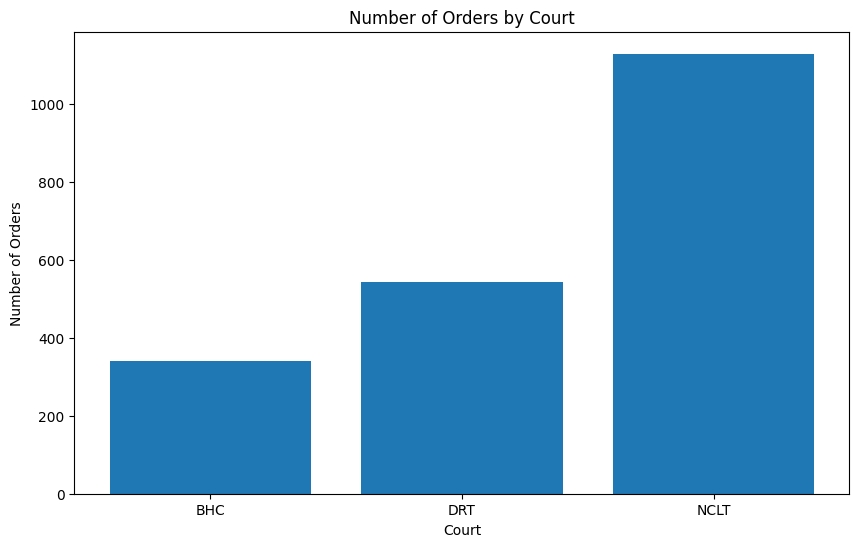

In [ ]:
# @title 4.5.1 Number of orders by court

# Assuming 'df' is your DataFrame with 'court' and 'whether_substantive' columns

# Group by court and calculate the number of orders
court_order_counts = df.groupby('court').size()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(court_order_counts.index, court_order_counts.values)
plt.xlabel('Court')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Court')
plt.show()


<b> Figure 1: </b> Distribution of orders by court.

Figure 1 illustrates the distribution of cases and orders across three courts. While all three courts have an equal number of cases (200 each), there is a notable disparity in the number of orders issued.

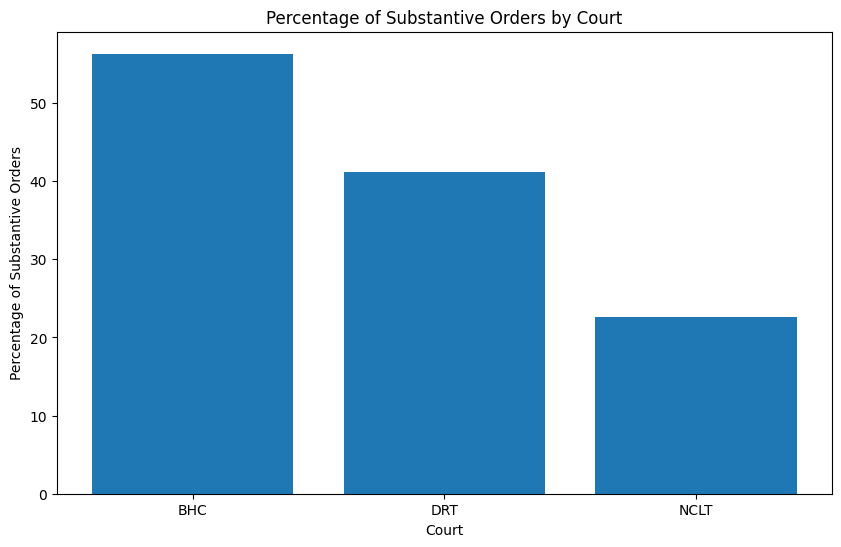

In [ ]:
# @title 4.5.2 Percentage of substantive orders by court

# Group by court and calculate the percentage of substantive orders
court_substantive_percentage = df.groupby('court')['WHETHERSUBSTANTIVE'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(court_substantive_percentage.index, court_substantive_percentage.values)
plt.xlabel('Court')
plt.ylabel('Percentage of Substantive Orders')
plt.title('Percentage of Substantive Orders by Court')
plt.show()


<b> Figure 2: </b> Percentage of substantive orders by court.

Figure 2 illustrates the percentage of substantive orders by court. Non-substantive orders are significantly more than substantive.

## 4.7 Examining original PDFs

The original PDF can be examined by converting bytes to images or text.

As an example, in the following cell, we show the first page of the first PDF.

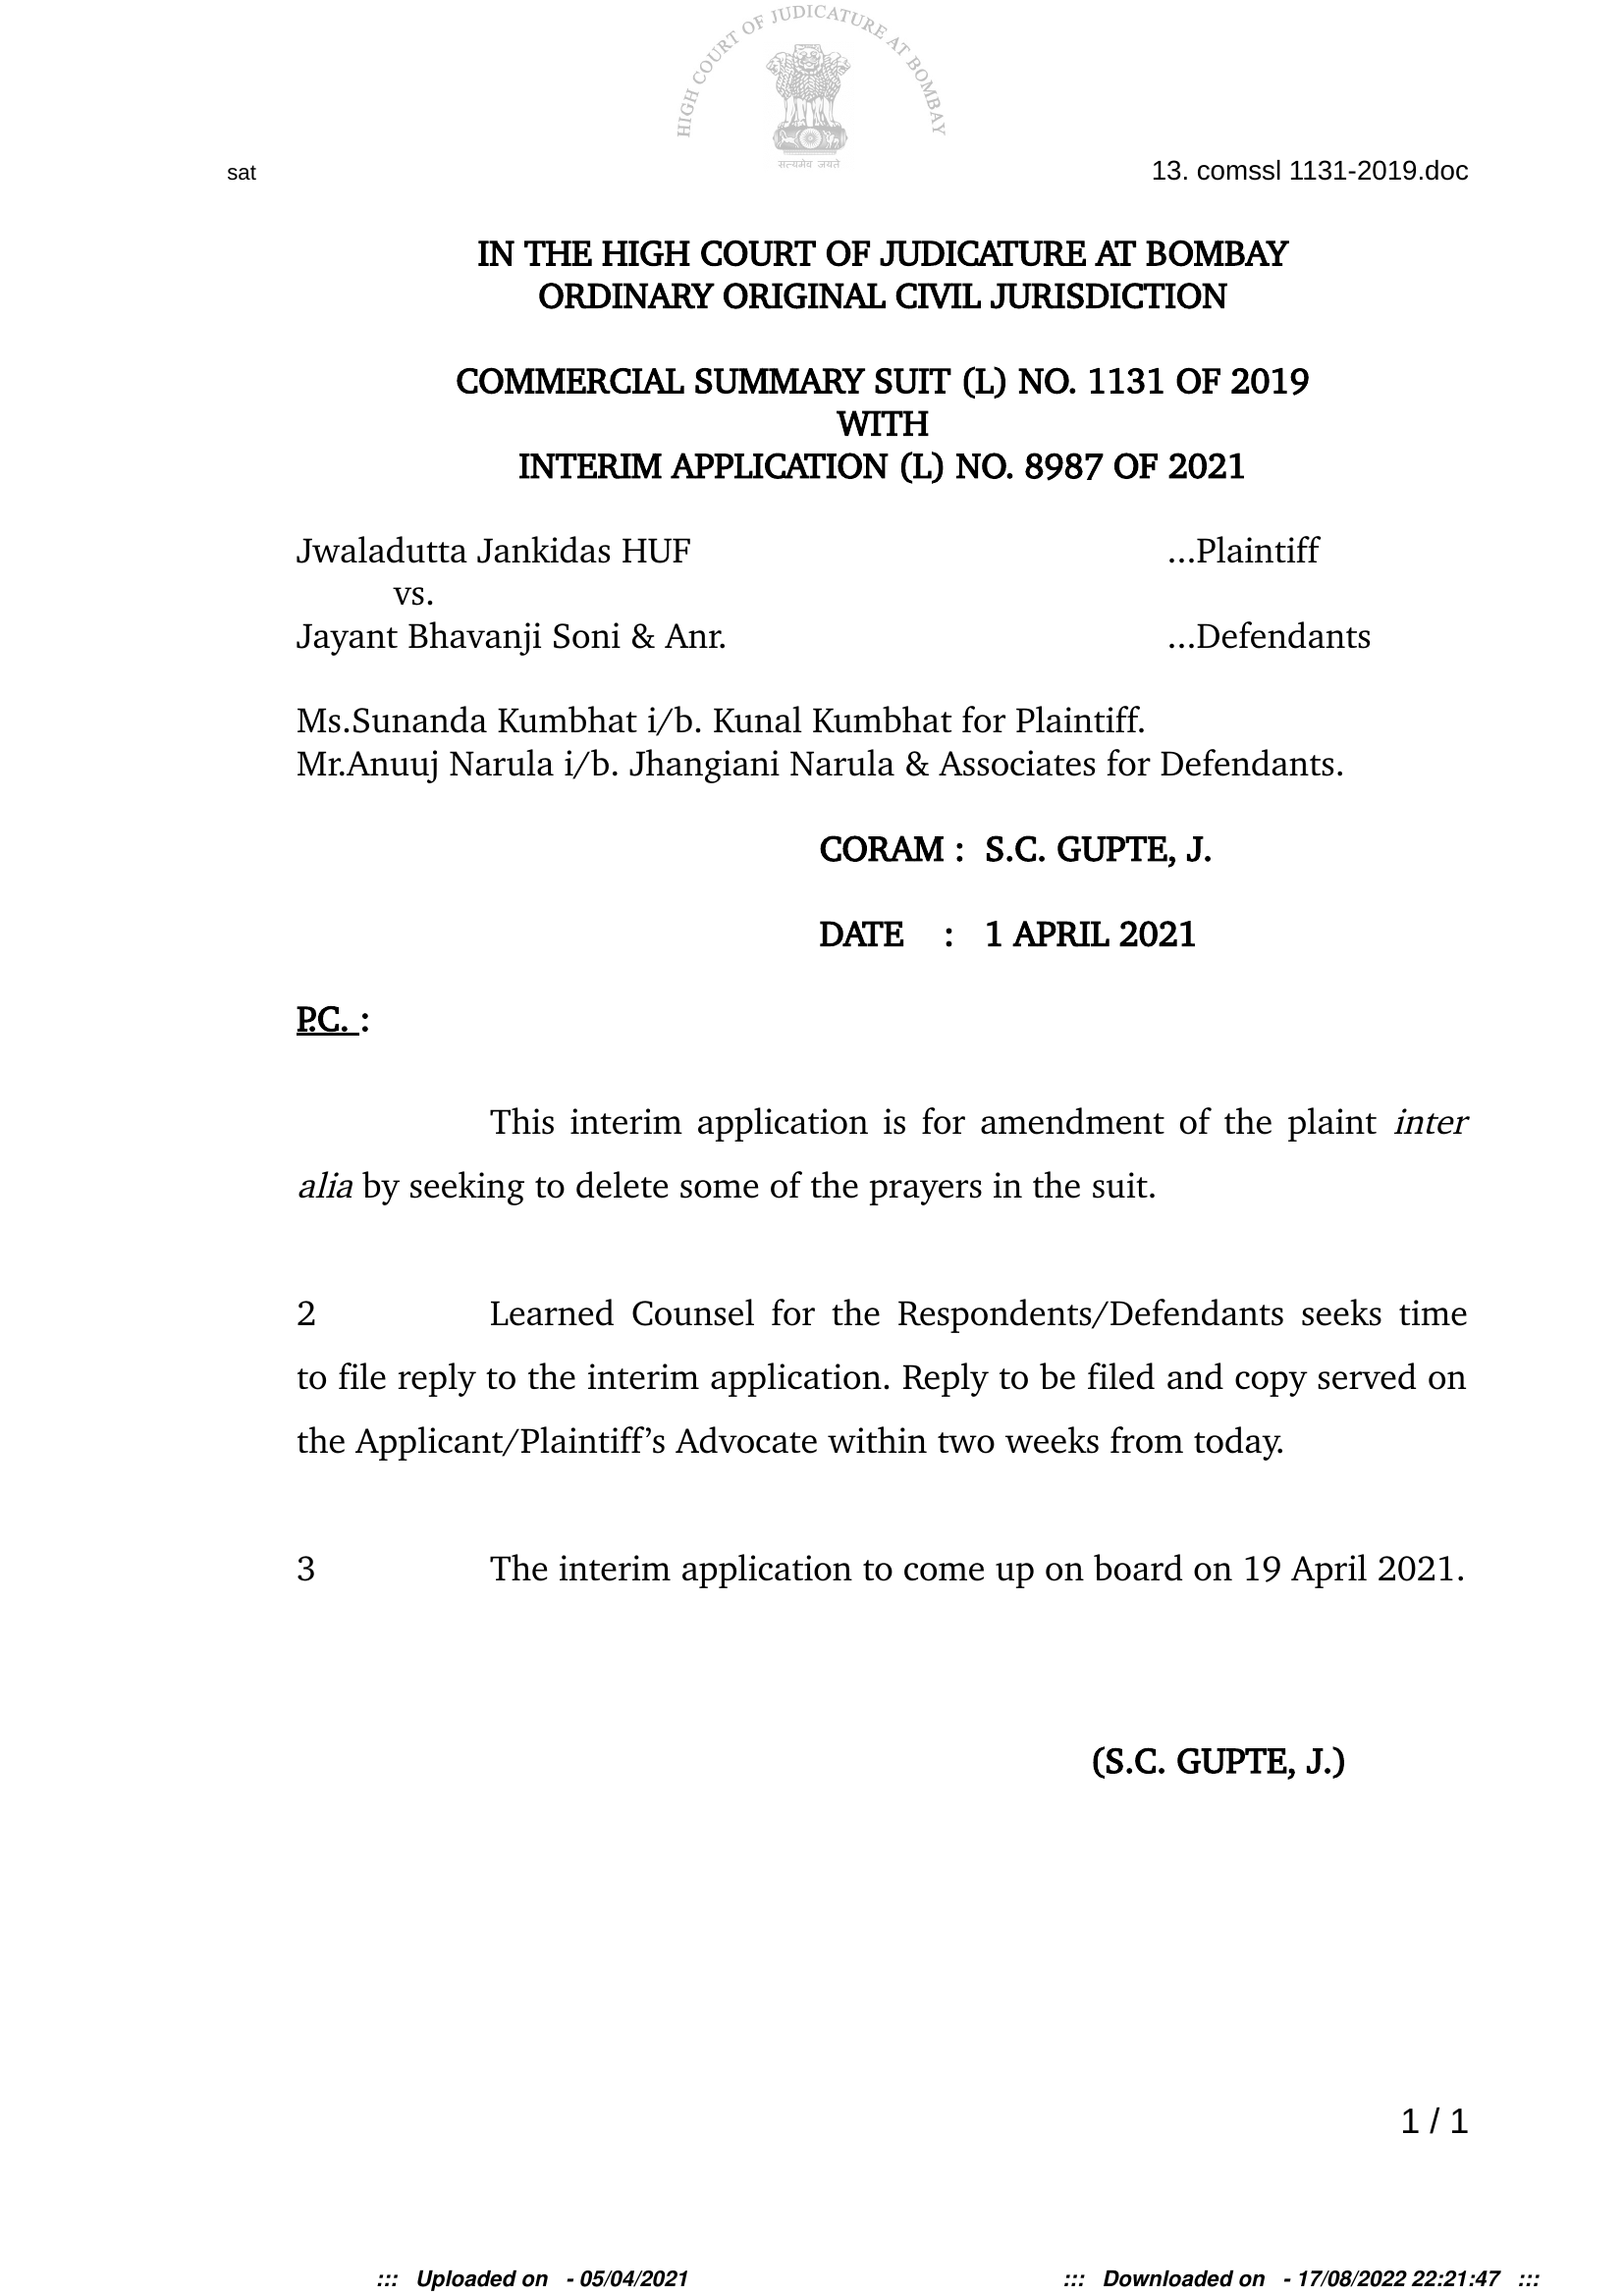

In [ ]:
pdf_blob = df["pdf_blob"][0] # The blob of the first order

convert_from_bytes(pdf_blob)[0] # Displaying the first page of the order

<b> Figure 3: </b> Preview of sample order.

## 4.8 Extract text from PDFs

To apply NLP techniques, the text must first be extracted from the PDFs.

In most cases, the text is embedded in the PDF, which means it can be easily extracted. In other cases, optical character recognition (OCR) is used to extract the text, which means converting images of text into editable and searchable formats.

The `read_pdf_text_from_blob` function reads text from byte data. When text is embedded in the PDF, `pdfplumber` extracts it directly. If this extraction fails, `tesseract` applies OCR to retrieve the text.

While the extraction may not be flawless, it is generally adequate for NLP tasks. Instances where watermarks or handheld scanning hinder extraction exit, but they rare.

As an example, we extract the text of the first PDF file in the database, which is shown section 4.7.

In [ ]:
read_pdf_text_from_blob(df["pdf_blob"][0])

'sat 13. comssl 1131-2019.doc\nIN THE HIGH COURT OF JUDICATURE AT BOMBAY\nORDINARY ORIGINAL CIVIL JURISDICTION\nCOMMERCIAL SUMMARY SUIT (L) NO. 1131 OF 2019\nWITH\nINTERIM APPLICATION (L) NO. 8987 OF 2021\nJwaladutta Jankidas HUF ...Plaintiff\nvs.\nJayant Bhavanji Soni & Anr. ...Defendants\nMs.Sunanda Kumbhat i/b. Kunal Kumbhat for Plaintiff.\nMr.Anuuj Narula i/b. Jhangiani Narula & Associates for Defendants.\nCORAM : S.C. GUPTE, J.\nDATE : 1 APRIL 2021\nP.C. :\nThis interim application is for amendment of the plaint inter\nalia by seeking to delete some of the prayers in the suit.\n2 Learned Counsel for the Respondents/Defendants seeks time\nto file reply to the interim application. Reply to be filed and copy served on\nthe Applicant/Plaintiff’s Advocate within two weeks from today.\n3 The interim application to come up on board on 19 April 2021.\n(S.C. GUPTE, J.)\n1 / 1\n::: Uploaded on - 05/04/2021 ::: Downloaded on - 17/08/2022 22:21:47 :::\n'

We use the `apply` method from `pandas` to extract the text of all the files. We store in new column called `pdf_text`.

In [ ]:
df["pdf_text"] = df["pdf_blob"].apply(read_pdf_text_from_blob) # This will take some time to execute

After extracting the texts from the orders, NLP techniques can be applied for further analysis.

# 5 Machine learning based classifcation

Classifiers in machine learning are models used to categorize data into distinct classes. For example, an email spam classifier sorts emails into two categories: spam or not spam. The classifier is trained using supervised learning, where the training data consists of emails labeled with these categories. Based on features like the sender’s address, subject line, and text content, it learns patterns that differentiate spam from legitimate emails. Once trained, the model can predict whether a new email is spam or not.

The task of classifying court orders as substantive or non-substantive hearings can similarly be turned into a classification problem. We train the model to treat each court order as a data point and define two possible classes: substantive or non-substantive. Features such as the language used in the order, keywords (like "adjourned" or "disposed"), and the outcome of the hearing are extracted. A machine learning model, trained using supervised learning with a dataset of labeled court orders, can then learn to recognize patterns in the text. Once trained, the model can classify new court hearings into either category based on these patterns.

This binary classification problem follows the same logic as spam classification but is applied to legal documents, where the goal is to predict whether a court order advances the resolution of a case.

In this classification task, we use LightGBM (Ke et al., 2017), a gradient boosting framework that efficiently handles large datasets and high-dimensional features. LightGBM builds decision trees iteratively to improve predictions, making it well-suited for text-based classification. By training on labeled court orders, it learns patterns to predict whether a new order is substantive or non-substantive. In Appendix A, we also explore Multinomial Naive Bayes and Logistic Regression as alternative classification models.



## 5.1 Preprocessing

Before building a classifier, we preprocess the data, which ensures the text is cleaned, normalized, and standardized. By converting text to lowercase, a model can process the text in a case-insensitive way, making comparisons uniform. Removing HTML tags, URLs, email addresses, punctuation, and special characters eliminates noise that doesn't contribute meaningful information to the classification task. Tokenizing the text into individual words breaks the text down for further processing. Removing stopwords ensures that the model focuses on meaningful words, improving the signal in the data.

Lemmatizing is important because it reduces words to their base or root form, ensuring that different inflected forms of a word (e.g., "running" and "ran") are treated as the same word ("run"). This helps a machine learning model generalize better by reducing variability in the text data.

In [ ]:
# @title 5.1.1 Download necessary resources

# Download the Punkt tokenizer for sentence segmentation
nltk.download('punkt')

# Download stopwords for removing common unimportant words
nltk.download('stopwords')

# Download WordNet for lemmatization (converting words to their base form)
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

The Punkt tokenizer, stopwords, and WordNet resources are downloaded using NLTK.

In [ ]:
# @title 5.1.2 Defining a function to preprocess the data

def preprocess_data(df, text_column='pdf_text'):
    """
    Preprocesses the given DataFrame by performing various text cleaning and normalization tasks.

    Args:
        df (pd.DataFrame): The DataFrame to preprocess.
        text_column (str, optional): The name of the column containing text to preprocess. Defaults to 'pdf_text'.

    Returns:
        pd.DataFrame: The preprocessed DataFrame.
    """

    # Convert text to lowercase for case-insensitive processing
    df[text_column] = df[text_column].str.lower()

    # Remove HTML tags, URLs, email addresses, punctuation, and special characters
    df[text_column] = df[text_column].str.replace(r'<.*?>', '', regex=True)
    df[text_column] = df[text_column].str.replace(r'http[s]?://\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace(r'\S*@\S*\s?', '', regex=True)
    df[text_column] = df[text_column].str.replace(r'[^a-z0-9\s]', '', regex=True)

    # Tokenize the text into individual words
    df[text_column] = df[text_column].apply(lambda x: word_tokenize(x))

    # Remove stopwords (common words that don't add much meaning)
    stop_words = set(stopwords.words('english'))
    df[text_column] = df[text_column].apply(lambda x: [word for word in x if word not in stop_words])

    # Lemmatize words to their base form
    lemmatizer = WordNetLemmatizer()
    df[text_column] = df[text_column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Join the tokens back into a string
    df[text_column] = df[text_column].apply(lambda x: ' '.join(x))

    return df

We define function to preprocess text data by converting text to lowercase, removing unwanted elements (HTML tags, URLs, punctuation), tokenizing, removing stopwords, and lemmatizing. The function returns the cleaned DataFrame for further analysis.

In [ ]:
# @title 5.1.3 Downsampling

def downsample_data(df, label_column='WHETHERSUBSTANTIVE'):
    """
    Downsamples the majority class to match the minority class in a binary classification dataset.

    Args:
        df (pd.DataFrame): The DataFrame to downsample.
        label_column (str, optional): The name of the column containing the binary labels.
                                      Defaults to 'WHETHERSUBSTANTIVE'.

    Returns:
        pd.DataFrame: The downsampled DataFrame with balanced classes.
    """
    # Separate majority and minority classes
    df_majority = df[df[label_column] == 0]
    df_minority = df[df[label_column] == 1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority,
                                       replace=False,    # sample without replacement
                                       n_samples=len(df_minority),
                                       random_state=123)  # for reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    return df_downsampled

To address potential class imbalance in our dataset, seen in Figure 2, we implement a downsampling strategy. This involves reducing the number of samples in the majority class to match the number in the minority class, ensuring that our model isn't biased towards the more prevalent class.

In the following cell, we apply the preprocessing and downsampling methods to our DataFrame.

In [ ]:
df_preprocessed = preprocess_data(df, text_column='pdf_text')

df_downsampled = downsample_data(df_preprocessed, label_column='WHETHERSUBSTANTIVE')

## 5.2 Vectorisation

Vectorization in NLP transforms text data into numerical format so that machine learning models can process it. Since models work with numbers rather than raw text, vectorization converts words or tokens into vectors that represent their occurrence or significance in the text.

TF-IDF (Term Frequency-Inverse Document Frequency) is a vectorization technique that assigns a weight to each word based on how frequently it appears in a document (term frequency) and how rare it is across all documents (inverse document frequency). This helps prioritize important words that carry more meaning while downplaying common words that appear everywhere.

In the following cell, we define a function for building a TF-IDF vectorisation model.

In [ ]:
def vectorize_text(train_data, test_data):
    """
    Vectorizes text data using TF-IDF.

    Args:
        train_data (iterable): Training text data.
        test_data (iterable): Test text data.

    Returns:
        tuple: (X_train_tfidf, X_test_tfidf, vectorizer)
    """
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    X_train_tfidf = vectorizer.fit_transform(train_data)
    X_test_tfidf = vectorizer.transform(test_data)
    return X_train_tfidf, X_test_tfidf, vectorizer

The `ngram_range` parameter in the `TfidfVectorizer` specifies the size of the n-grams to be considered during vectorization. An n-gram is a contiguous sequence of *n* items (words, in this case) from a given text. By setting `ngram_range=(1, 2)`, the vectorizer will include both unigrams (single words) and bigrams (two-word combinations) in the feature set.

For example, given the phrase "not adourned":

- The unigram features would be: `["not", "adourned"]`
- The bigram features would be: `["not adourned"]`

This means the vectorizer captures not just the individual words, but also the relationship between them as a phrase.

## 5.3 Splitting the data

In the following cell, the data is split into two subsets: the training set and the testing set. The training set is used to train the model, allowing it to learn patterns and relationships within the data, while the testing set is used to evaluate the model's performance on unseen data, ensuring that it generalizes well.

The `test_size=0.2` parameter indicates that 20% of the data is be reserved for testing, while 80% is be used for training. The `random_state=42` ensures that the split is reproducible, allowing consistent results across different runs. After the split, the text data is vectorized using TF-IDF for both the training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_downsampled['pdf_text'],
                                                        df_downsampled['WHETHERSUBSTANTIVE'],
                                                        test_size=0.2, random_state=42)

X_train_tfidf, X_test_tfidf, vectorizer = vectorize_text(X_train, X_test)

## 5.4 Model building

In the next cell, we instantiate LightGBM Classifier. The model is then trained on the TF-IDF vectorized training data (the order PDFs) and corresponding labels (y_train), learning to predict whether the order is substantive or non-substantive.

In [ ]:
clf = lgb.LGBMClassifier()

# Train the classifier
clf.fit(X_train_tfidf, y_train)

[LightGBM] [Info] Number of positive: 538, number of negative: 534
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29917
[LightGBM] [Info] Number of data points in the train set: 1072, number of used features: 1106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501866 -> initscore=0.007463
[LightGBM] [Info] Start training from score 0.007463


LGBMClassifier()

## 5.5 Model evaluation

In the following cell, we predict classes of the orders set aside for testing. Subsequently, we evaluate the results using sklearn's classification report.

In [ ]:
# Predict on test data
predictions = clf.predict(X_test_tfidf)

# Evaluate the classifier
report_ml = classification_report(y_test, predictions)
print(report_ml)

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       136
         1.0       0.87      0.92      0.89       132

    accuracy                           0.89       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.89      0.89      0.89       268



<b> Table 5: </b> Classification report of LightGBM model's predictions.  

The models achieves an overall accuracy of 89%. This mean it made correct predictions for 89% of the instances in the test dataset (both substantive and non-substantive orders).

**Class-wise Breakdown:**

1. **Non-substantive orders:**
   - **Precision:** 0.91 — Out of all instances predicted as non-substantive, 91% were actually non-substantive.
   - **Recall:** 0.87 — The model correctly identified 87% of all actual non-substantive orders.
   - **F1-Score:** 0.89 — The harmonic mean of precision and recall, indicating a balance between them.
   - **Support:** 136 — There were 136 actual non-substantive orders in the test dataset.

2. **Substantive orders:**
   - **Precision:** 0.87 — Out of all instances predicted as substantive, 87% were actually substantive.
   - **Recall:** 0.92 — The model correctly identified 92% of all actual substantive orders.
   - **F1-Score:** 0.89 — This indicates the balance between precision and recall for substantive orders.
   - **Support:** 132 — There were 132 actual substantive orders in the test dataset.

The model performs well for both substantive and non-substantive classifications. The balance between precision and recall for both classes (with an F1-score of 0.89) suggests the model is equally effective at minimizing false positives and false negatives. The slight difference in precision and recall between the classes indicates that the model is slightly more conservative when predicting substantive orders, but it correctly identifies a higher proportion of them. This classification report indicates robust performance across both categories.

# 6 Classification using LLMs

A major advantage of using LLMs for this task is that they eliminate the need for labeled training data, which is often expensive and time-consuming to produce. Instead of relying on manually annotated datasets, the model leverages its pre-trained knowledge to analyze the text of court orders directly. It classifies orders by recognizing patterns and structures learned from extensive training on large text corpora.

In this unsupervised approach, the LLM identifies relevant features and characteristics of the text without predefined labels. We provide the LLM with instructions similar to the guidelines given to a law intern for making the classification. The model uses its contextual understanding and semantic insights to determine whether a court order is substantive or non-substantive, enabling effective classification without manual labeling.

We install and use Ollama, an open-source tool that facilitates working with LLMs locally. Ollama offers an easy-to-use interface for managing models, enabling deployment on local machines without requiring cloud-based solutions. Running LLMs locally, like the 27-billion-parameter Gemma 2 model by Google, provides flexibility and control. Other similar models can also be used in this setup.

Language model APIs by [OpenAI](https://platform.openai.com/), [Groq](https://groq.com/), can also be used instead of an LLM running locally.  

## 6.1 Setting up

In this cell, we download and install Ollama by executing a script from the Ollama website using a shell command. After installation, the Ollama server is started, and the specified model (`gemma2:27b`) is downloaded from the Ollama library.

The form input allows you to change the model, with a full list of available models found on their [website](https://ollama.com/library/).

The model runs in the background, enabling it to be used for processing tasks locally, without relying on cloud-based services.

**Note:** Commands starting with `!` are bash commands executed directly in the shell.

In [ ]:
# @title 6.1.1 Download and install Ollama
%%capture

# This will take some time to run

MODEL_NAME = "gemma2:27b" # @param {"type":"string","placeholder":"Model Name"}
# Find Ollama models: https://ollama.com/library/

!curl -fsSL https://ollama.com/install.sh | sh # Download and install Ollama
!nohup ollama serve & # Start Ollama server
!ollama pull {MODEL_NAME} # Download model
!nohup ollama run {MODEL_NAME} & # Run the model in the background

We initiate the model using Langchain's Ollama constructor.

In [ ]:
# @title 6.1.2 Initate the LLM
llm = Ollama(model=MODEL_NAME, num_predict = 1)

We use the model to predict the class of the order (0 or 1) by setting num_predict = 1, ensuring the LLM returns a single token.

## 6.2 Order classifying prompt

We prompt the LLM to classify the order using the same rules provided to law interns for labeling, as shown in Table 2.

In this cell, we create a function that takes the order text as input and returns a single token representing the predicted label.

In [ ]:
def classify_using_llm(llm, order_text):

    # Define the rules and keywords as specified in the HTML file
    rules_keywords = """
    Indicators for classification (including synonyms with similar meanings, case-insensitive):
    - Adjourned: Date, Not on board, Listed for hearing, Listed for admission, Listed for further consideration, Listed for order, Deferred, Passover, Non-appearance of parties, Technical glitch, Paucity of time, Stand-over, Seeks time, Time for filing reply, Time for filing rejoinder, List for arguments, Adjourn, Adjournment
    - Procedure: Direction Issued, Clarified, Repeated, Taken on record, Amendment, No further adjournment, Already heard/disposed, Filed, Directed
    - Disposed: Dismissed, Disposed, Admitted, Allowed, Withdrawn, Transfer, Scheme sanctioned, Resolution plan approved, Rejected, Dissolved, Approved, Consent terms, Settlement, Infructuous, Closed, Liquidation, Liquidated, IRP Appointed, Settled
    - For Orders: Reserved for orders, Corrigendum order, Order pronounced, CRP initiated, Correction of order, Rectification of order, Clarified order
    - Misc: Part-heard, Dereserved, Awaiting NCLT Orders, Appearance, To be filed before IRP, Condoned, Recused, Returned to registry, Compounding, Continued arguments, Concluded arguments, Heard

    Classify the order as substantive (1) or non-substantive (0) based on these categories:
    - substantive: Disposed (1), For Orders (1), Misc (1)
    - Non-substantive: Adjourned (0), Procedure (0)
    """

    # Prepare the prompt including rules and the PDF text
    prompt = f"{rules_keywords}\nGiven the court order text: '{order_text}', classify it as 1 (substantive) or 0 (non-substantive). The classification should be case-insensitive and consider synonyms with similar meanings. Respond with only 1 or 0, no justification or sentence. Avoid punctuation."

    # Use the model to classify the order
    classification = llm.invoke(prompt, seed = 123)
    # Assuming the model returns a straightforward '1' or '0' as text
    return int(classification)

## 6.3 Classifying orders

For a like-to-like comparison, we predict the labels for the same set of orders used to evaluate the supervised learning model.

In [ ]:
data = {'WHETHERSUBSTANTIVE': y_test, 'pdf_text': X_test}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

for index, row in tqdm(df.iterrows(), total=len(df)):

    core_text = row['pdf_text']
    retries = 0
    classification = classify_using_llm(llm, core_text)
    df.at[index, 'classification'] = classification

# Extract ground truth and model predictions
y_true = df['WHETHERSUBSTANTIVE']
y_pred = df['classification']

100%|██████████| 268/268 [09:23<00:00,  2.10s/it]


## 6.4 Evaluation

We evaluate the results using sklearn's classification report.

In [ ]:
# Generate classification report
report_llm = classification_report(y_true, y_pred)

# Print the report
print(report_llm)

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       136
         1.0       0.89      0.77      0.82       132

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.83       268



<b> Table 6: </b> Classification report of LLM's predictions.  

The model achieves an overall accuracy of 84%, meaning it made correct predictions for 84% of the instances in the test dataset, including both substantive and non-substantive orders.

**Class-wise Breakdown:**

1. **Non-substantive orders:**
   - **Precision:** 0.80 — Of all instances predicted as non-substantive, 80% were actually non-substantive.
   - **Recall:** 0.90 — The model correctly identified 90% of all actual non-substantive orders.
   - **F1-Score:** 0.85 — Represents the balance between precision and recall for non-substantive orders.
   - **Support:** 136 — There were 136 actual non-substantive orders in the test dataset.

2. **Substantive orders:**
   - **Precision:** 0.89 — Of all instances predicted as substantive, 89% were actually substantive.
   - **Recall:** 0.77 — The model identified only 77% of all actual substantive orders, indicating a tendency to miss some substantive orders.
   - **F1-Score:** 0.82 — Reflects the balance between precision and recall for substantive orders.
   - **Support:** 132 — There were 132 actual substantive orders in the test dataset.

**Discrepancy in Recall:**

There is a noticeable discrepancy in the recall values between the two classes. The value for non-substantive orders (0.90) is higher than that for substantive orders (0.77), meaning the model is better at identifying non-substantive orders. This discrepancy suggests that the model misses more substantive orders, potentially leading to an imbalance in classification.

Secondly, the LLM took about 9 minutes to label 268 orders. The LLM’s slower performance, despite its flexibility, makes it less suited for large-scale applications.

# 7 Conclusions

This study demonstrates the feasibility and potential of using machine learning and large language models to parse and automate the classification of court orders as substantive or non-substantive. Our results show that both approaches can achieve good performance, with each offering distinct advantages.

The LightGBM classifier achieved an overall accuracy of 89%, with balanced precision and recall for both classes. This traditional machine learning technique, when applied to carefully preprocessed text data, not only effectively distinguishes between substantive and non-substantive court orders but does so with remarkable speed. The ability to process large volumes of data quickly makes this approach particularly suitable for large-scale applications.

The large language model (Gemma 2B) approach, while slightly less accurate at 84%, offers unique benefits. It performed reasonably well without requiring specific training data, relying instead on its general language understanding capabilities and a set of provided rules. This characteristic makes it potentially applicable to orders from other courts or jurisdictions without the need for extensive data collection and labeling efforts. However, the LLM-based classification is significantly slower compared to the ML approach, which could limit its practicality for large-scale, time-sensitive applications.

The speed difference between these approaches presents an important trade-off. The ML model's fast processing makes it ideal for analyzing large datasets of court orders, enabling rapid analysis at a scale that would be infeasible with manual classification. Conversely, while slower, the LLM approach offers greater flexibility and potential transferability across different legal contexts without retraining.

As LLM technology continues to advance rapidly, we can reasonably expect improvements in both the accuracy and speed of LLM-based classifications. Future developments may narrow the performance gap with traditional ML approaches, potentially offering a more balanced combination of speed, accuracy, and adaptability.

In conclusion, our study demonstrates one application, the binary categorisation of hearings, to illustrate the importance of using data-science techniques in the broader field of legal systems research. Such models can be deployed for other non-binary classifications, such as nature of disposal types or stage-classification of hearings. By automating the classification of court orders, we can enhance the ability to analyze court performance and predict case trajectories. The choice between ML and LLM approaches - or a combination of both - will depend on the specific requirements of the application, balancing the need for speed, accuracy, and adaptability to improve the efficiency and transparency of legal systems across various jurisdictions.

Importantly, to ensure the accessibility and reproducibility of our work, we have made our complete analysis available through a notebook hosted on Google Colab. This cloud-based environment allows other researchers, legal professionals, and interested parties to easily access, run, and extend our analysis without the need for complex local setups. By sharing our methodology in this accessible format, we aim to encourage further exploration and advancement in the application of data science to legal research, fostering collaboration and innovation in this important field.

# References

1. Rowe, F., Maier, G., Arribas-Bel, D., & Rey, S. J. (2020). The potential of notebooks for scientific publication: Reproducibility, and dissemination. *REGION, 7*(3), 357. [https://doi.org/10.18335/region.v7i3.357](https://doi.org/10.18335/region.v7i3.357)
2. Manivannan, P., Suresh, K., Thomas, S., & Zaveri-Shah, B. (2023). How substantial are non-substantive hearings in Indian courts: some estimates from Bombay. The Leap Blog. [https://blog.theleapjournal.org/2023/12/how-substantial-are-non-substantive.html#gsc.tab=0](https://blog.theleapjournal.org/2023/12/how-substantial-are-non-substantive.html#gsc.tab=0)
3. Jauhar A., Khaitan, N., Kumar, A.P, & Rahman, F. (2016). Towards an Efficient and Effective Supreme Court. Vidhi Centre for Legal Policy. [https://vidhilegalpolicy.in/wp-content/uploads/2019/05/TowardsanEffectiveandEfficientSupremeCourt.pdf](https://vidhilegalpolicy.in/wp-content/uploads/2019/05/TowardsanEffectiveandEfficientSupremeCourt.pdf)
4. Myers, N.M. (2015). Who Said Anything About Justice? Bail Court and the Culture of Adjournment. *Canadian Journal of Law and Society*, 30(01), 127-146. [https://www.cambridge.org/core/journals/canadian-journal-of-law-and-society-la-revue-canadienne-droit-et-societe/article/abs/who-said-anything-about-justice-bail-court-and-the-culture-of-adjournment/2CFD0E35E5EAB0940CACB8335E113A17](https://www.cambridge.org/core/journals/canadian-journal-of-law-and-society-la-revue-canadienne-droit-et-societe/article/abs/who-said-anything-about-justice-bail-court-and-the-culture-of-adjournment/2CFD0E35E5EAB0940CACB8335E113A17)
5. Daksh (2016). Time and Motion Study of four District and Sessions Courts. [https://www.dakshindia.org/wp-content/uploads/2019/11/DAKSH-TIME-AND-MOTION-STUDY-OF-FOUR-DISTRICT-AND-SESSIONS-COURTS-3.pdf](https://www.dakshindia.org/wp-content/uploads/2019/11/DAKSH-TIME-AND-MOTION-STUDY-OF-FOUR-DISTRICT-AND-SESSIONS-COURTS-3.pdf)

6. Reis, J., Santo, P. E., & Melão, N. (2019). Impacts of artificial intelligence on public administration: A systematic literature review. In Proceedings of the 2019 14th Iberian Conference on Information Systems and Technologies (CISTI) (pp. 1–7). Coimbra, Portugal: IEEE. [https://doi.org/10.1109/CISTI.2019.8760836](https://doi.org/10.1109/CISTI.2019.8760836)

7. Bansal, N., Sharma, A., & Singh, R. (2019). A review on the application of deep learning in legal domain. In IFIP International Conference on Artificial Intelligence Applications and Innovations (pp. 374–381). Hersonissos, Crete, Greece: Springer. [https://doi.org/10.1007/978-3-030-19823-7_32](https://doi.org/10.1007/978-3-030-19823-7_32)

8. Nay, J. (2018). Natural Language Processing and Machine Learning for law and policy texts. Retrieved from [https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3438276](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3438276)

9. Östling, Andreas, Holli Sargeant, Huiyuan Xie, Ludwig Bull, Alexander Terenin, Leif Jonsson, Måns Magnusson, and Felix Steffek. 2023. “The Cambridge Law Corpus: A Dataset for Legal AI Research.” Advances in Neural Information Processing Systems 36:41355–85.

10. Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., ... & Liu, T. Y. (2017). [Lightgbm: A highly efficient gradient boosting decision tree. Advances in neural information processing systems, 30.](https://proceedings.neurips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html)

# Appendix

## A. Evaluating other ML models.

We have also tested other machine learning models, specifically Multinomial Naive Bayes and Logistic Regression, to classify court orders into substantive and non-substantive categories.

## A.1 Naive Bayes

This model is a probabilistic classifier based on Bayes' theorem, commonly used for text classification. It assumes that word occurrences follow a multinomial distribution, which makes it effective for high-dimensional data like documents or emails. Naive Bayes works by calculating the probability of each class (substantive or non-substantive) given the input features (words in the text).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train_tfidf, y_train)

# Predict on test data
predictions = clf.predict(X_test_tfidf)

# Evaluate the classifier
report_ml = classification_report(y_test, predictions)

print(report_ml)


              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       136
         1.0       0.72      0.77      0.74       132

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



The model achieved an accuracy of 74%. It had a precision of 0.76 for non-substantive orders and 0.72 for substantive orders, while recall values were 0.71 and 0.77, respectively. The relatively lower precision and recall indicate that the model struggles to distinguish between the two classes accurately, misclassifying some substantive orders as non-substantive and vice versa. The balanced f1-score of 0.74 reflects this difficulty in classification performance.

## A.2 Logistic regression

This linear model predicts the probability of a data point belonging to a particular class by fitting a linear decision boundary. Logistic regression is popular for binary classification problems because of its simplicity and effectiveness, especially when relationships between features and outcomes are linear. It calculates the likelihood of an order being substantive or non-substantive based on the input text features and thresholds the result to predict one of the two classes.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the Regression classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train_tfidf, y_train)

# Predict on test data
predictions = clf.predict(X_test_tfidf)

# Evaluate the classifier
report_ml = classification_report(y_test, predictions)

print(report_ml)




              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       136
         1.0       0.73      0.86      0.79       132

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.77       268



Logistic Regression achieved a higher accuracy of 78%. It had better precision for non-substantive orders (0.83) and substantive orders (0.73), but the recall was less balanced, with 0.76 for non-substantive and 0.86 for substantive. This suggests that Logistic Regression was able to classify non-substantive orders more precisely but had a tendency to predict substantive orders less accurately, missing some of them. The overall f1-score was 0.78, reflecting a more consistent performance compared to Naive Bayes, but still indicating room for improvement.

## B. Downloading Court Orders

### B.1 Bombay High Court (BHC)

1. Access the BHC Website:

   - Open the website of Bombay High Court: [https://bombayhighcourt.nic.in/index.php](https://bombayhighcourt.nic.in/index.php)

2. Locate the Case Status Page:

   - Click on the "Services" tab on the website's main navigation bar.
   - From the dropdown menu, hover on "Case Status."
   - Another dropdown menu will open, choose "Case No Wise".
   - This will take the user to the "Case Query" Page.

3. Filter for cases in the Case Query Page:

  - In the Case Query Page, key in the inputs for each field from the dropdown menu, as required.
  - For instance, for downloading orders of original civil suits for the year 2018 -

      (i) In "Side", select "Original";

      (ii) In "Type", select "Suits";

      (iii) In "Year", select "2018";

      (iv) Key in the "From Date" and "To Date" as 01-01-2018 and 31-12-2018;

      (vi) Click "List By Case Type" to display the results of the search. This will take the user to the "Case Details" page which lists all the cases filed in 2018.
    
4. Search and download orders:

      - In the "Case Details" page, click on the hyperlinked case no.s of each case to get detailed information on each case.

      - In the page with detailed information on the case, click on "Listing Dates/ Orders" to view and download all the orders for the case.


### B.2 National Company Law Tribunal (NCLT)

1. Access the NCLT website:

   - Open the NCLT Home page: [https://nclt.gov.in](https://nclt.gov.in)

2. Locate the Order Date Page:

  - Click on the "Judgement/ Orders by" tab on the website's main navigation bar.
   - From the dropdown menu, select "Order Date."

2. Filter for cases and download orders:

  - In the "Order Date" page, key in the required "Bench" and the "Date" range.
  - This will take the user to the "Daily Orders" page which lists all the cases heard in the given date range.
  - In the "Daily Orders" page, click on the hyperlinked case no.s of each case to get "Case Details" on each case.
  - In the "Case Details" page, click on the "Listing History (Orders)" tab to view and download all the orders for the case.

### B.3 Debt Recovery Tribunal (DRT)

1. Access the DRT Website:

   - Open the DRT Home page: [https://drt.gov.in](https://drt.gov.in)

2. Filter and download orders:

  - Click on the "Orders" tab on the website's main navigation bar. This will take the user to the "DRT/ DRAT Orders Page".
  - In the navigation pane for the "DRT/ DRAT Orders Page", select the tab "DRAT's Order / Final Order".
  - Key in the required DRAT Location, DRT Location and date to view and download the orders of all the cases heard on the given date in the given location.
